<a href="https://colab.research.google.com/github/Duckucy/113-2_Programing_Language/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib seaborn pandas openpyxl

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

### 最近三年壽險業個人人壽保險新契約件數、保額—公司別
連結：https://data.gov.tw/dataset/31714

In [2]:
from google.colab import files

uploaded = files.upload()

Saving 105-1最近三年壽險業個人人壽保險新契約件數、保額-公司別.csv to 105-1最近三年壽險業個人人壽保險新契約件數、保額-公司別.csv


/content/48最近五年投資型商品新契約危險保額(保單面額).csv

---



In [3]:
import pandas as pd

# Path to your CSV file
file_path = '/content/105-1最近三年壽險業個人人壽保險新契約件數、保額-公司別.csv'

# Read the CSV file, specifying the encoding as 'big5'
df = pd.read_csv(file_path, encoding='big5') # 使用 big5 編碼讀取檔案

# Display the first few rows of the DataFrame
df

,年度,公司別,個人人壽保險新契約件數,個人人壽保險新契約保額(萬元)
0,2021,01-臺銀人壽,11624,1978986
1,2021,02-台灣人壽,163795,13302656
2,2021,03-保誠人壽,28609,3546820
3,2021,04-國泰人壽,301948,15604453
4,2021,05-凱基人壽,144198,19601635
...,...,...,...,...
61,2023,57-友邦人壽,19485,2433877
62,2023,61-元大人壽,22107,3045737
63,2023,64-全球人壽,108155,12367405
64,2023,67-法國巴黎人壽,15859,7082924


In [4]:
df.columns = ['Year', 'Company', 'NewContracts', 'NewSumAssured_10k']
df['Year'] = df['Year'].astype(str)

In [9]:
font_path = "/content/NotoSansTC-VariableFont_wght.ttf"
font_prop = fm.FontProperties(fname=font_path)

In [10]:
# 📌 前五大新契約件數公司
top5_companies = df.groupby("Company")["NewContracts"].sum().nlargest(5).index
df_top5 = df[df["Company"].isin(top5_companies)]

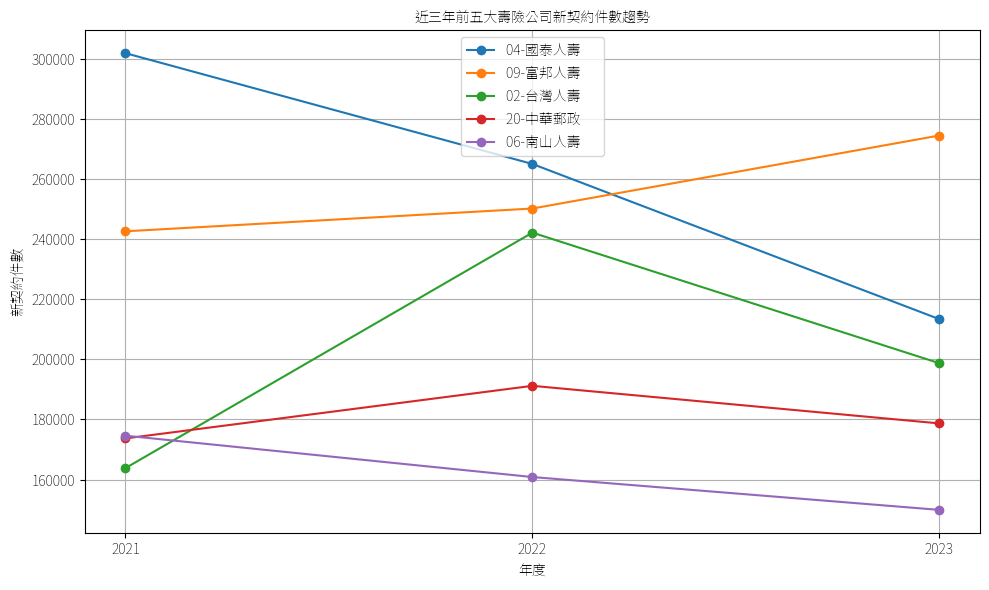

In [11]:
# 📊 折線圖：前五大壽險公司新契約件數趨勢
plt.figure(figsize=(10, 6))
for company in top5_companies:
    subset = df_top5[df_top5["Company"] == company]
    plt.plot(subset["Year"], subset["NewContracts"], marker="o", label=company)
plt.title("近三年前五大壽險公司新契約件數趨勢", fontproperties=font_prop)
plt.xlabel("年度", fontproperties=font_prop)
plt.ylabel("新契約件數", fontproperties=font_prop)
plt.legend(prop=font_prop)
plt.grid(True)
plt.xticks(fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.tight_layout()
plt.show()

1.折線圖：近三年前五大壽險公司新契約件數趨勢\
用途：比較前五大公司在不同年度的業績表現

---

重點：

國泰人壽、台灣人壽長期維持高件數，顯示市場占有率高。\
某些公司件數波動劇烈，可能因政策或行銷策略改變。

<ipython-input-12-9ecd4db8748f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="NewSumAssured_10k", y="Company", data=df_2021, palette="Blues_r")


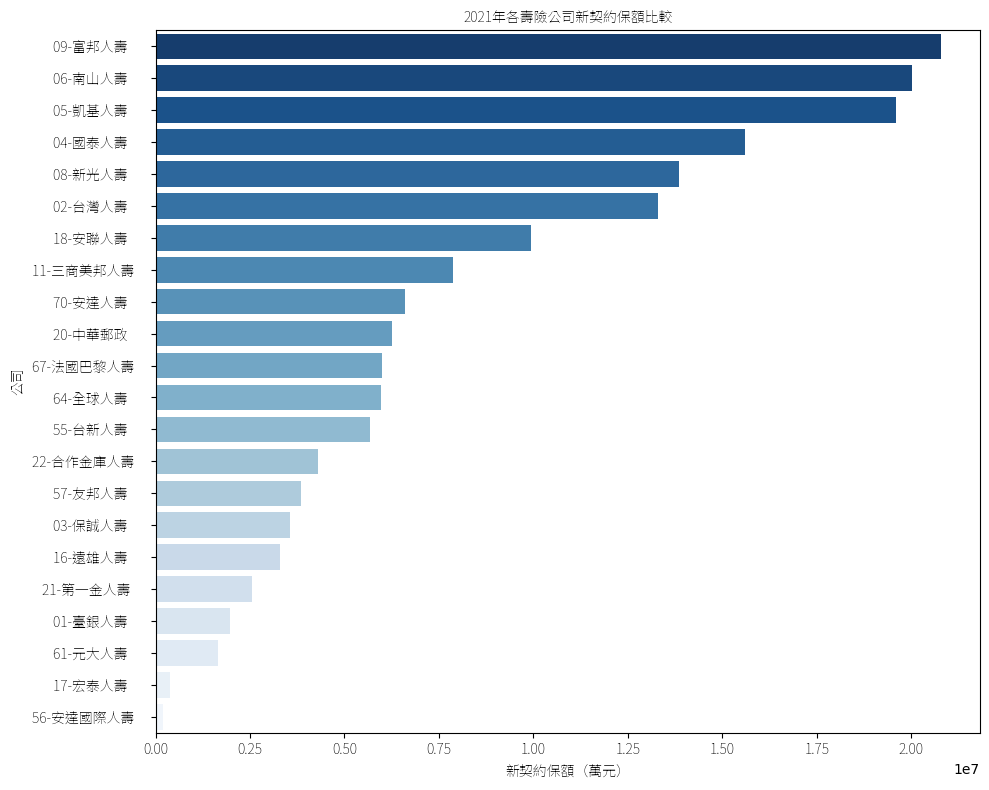

In [12]:
# 📊 長條圖：2021年各公司新契約保額（萬元）
df_2021 = df[df["Year"] == "2021"].sort_values(by="NewSumAssured_10k", ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x="NewSumAssured_10k", y="Company", data=df_2021, palette="Blues_r")
plt.title("2021年各壽險公司新契約保額比較", fontproperties=font_prop)
plt.xlabel("新契約保額（萬元）", fontproperties=font_prop)
plt.ylabel("公司", fontproperties=font_prop)
plt.xticks(fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.tight_layout()
plt.show()

2.長條圖：2021年各壽險公司新契約保額比較\
用途：觀察哪家壽險公司賣出較高價值的保單

---
重點：\
凱基人壽在保額上名列前茅，代表平均單一契約金額高。

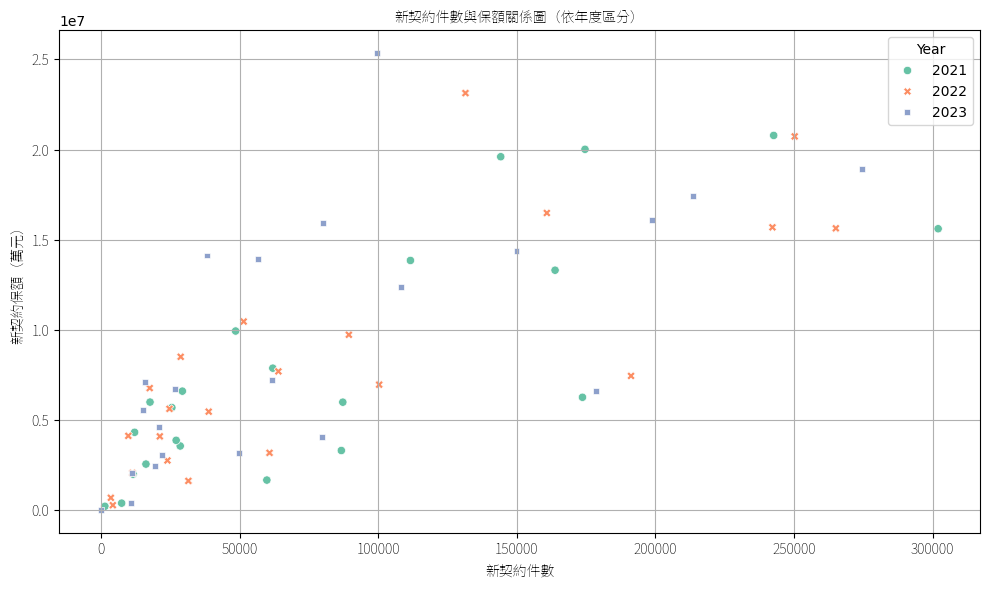

In [13]:
# 📊 散佈圖：新契約件數與保額關係（依年度區分）
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="NewContracts", y="NewSumAssured_10k", hue="Year", style="Year", palette="Set2")
plt.title("新契約件數與保額關係圖（依年度區分）", fontproperties=font_prop)
plt.xlabel("新契約件數", fontproperties=font_prop)
plt.ylabel("新契約保額（萬元）", fontproperties=font_prop)
plt.xticks(fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.grid(True)
plt.tight_layout()
plt.show()

3.新契約件數與保額關係圖（依年度區分） 用途：分析各公司之間是否存在「件數高 → 保額高」的正向關係。

---


重點：

整體呈現部分正相關，但有些公司如凱基人壽為高保額低件數型。

不同年份點位分布略有差異，可見市場環境年年變動。